# Convolutional Neural Networks
## Cape Town Deep Learning Talk 2017/06/19
### Alex Conway alex@numberboost.com

Heavily inspired by the fast.ai MOOC - highly recommended! :)
> https://github.com/fastai/courses

### conda install anything not already installed and debug until it works :P
OR just use the setup script at the fastai github repo above ;)

# GOAL:

https://memeburn.com/2017/06/spree-image-search/

# IMPORTS

load vgg

In [1]:
import os, sys
pwd = os.getcwd()
sys.path.insert(1, os.path.join(sys.path[0], '..'))
sys.path.insert(1, os.path.join(sys.path[0], 'utils'))
                
#import modules
from utils import *

from vgg16 import Vgg16
batch_size=64

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


for plotting

In [2]:
# setup matplotlib to display plots in the notebook
%matplotlib inline

# third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setup display options
pd.options.display.max_rows = 200
pd.options.display.float_format = '{:,.5g}'.format
np.set_printoptions(precision=5, suppress=False)

# setup seaborn to use matplotlib defaults & styles
sns.set()
sns.set(font_scale=1.2)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.style.use('fivethirtyeight')

# VIEW A FEW IMAGES

In [3]:
!pwd

/home/ubuntu/cnn_talk


In [4]:
! tree /home/ubuntu/cnn_talk/data/train/

/home/ubuntu/cnn_talk/data/train/
├── accessories
│   ├── productimg_1009.jpg
│   ├── productimg_1020.jpg
│   ├── productimg_1025.jpg
│   ├── productimg_1035.jpg
│   ├── productimg_1044.jpg
│   ├── productimg_1059.jpg
│   ├── productimg_1075.jpg
│   ├── productimg_1076.jpg
│   ├── productimg_107.jpg
│   ├── productimg_1087.jpg
│   ├── productimg_1100.jpg
│   ├── productimg_1120.jpg
│   ├── productimg_1122.jpg
│   ├── productimg_1130.jpg
│   ├── productimg_1144.jpg
│   ├── productimg_1173.jpg
│   ├── productimg_1176.jpg
│   ├── productimg_1186.jpg
│   ├── productimg_119.jpg
│   ├── productimg_11.jpg
│   ├── productimg_1210.jpg
│   ├── productimg_1212.jpg
│   ├── productimg_1225.jpg
│   ├── productimg_1237.jpg
│   ├── productimg_1246.jpg
│   ├── productimg_1247.jpg
│   ├── productimg_126.jpg
│   ├── productimg_1282.jpg
│   ├── productimg_1291.jpg
│   ├── productimg_1292.jpg
│   ├── productimg_1312.jpg
│   ├── productimg_1330.jpg
│   ├── productimg_1345.jpg
│   ├── productimg_1358.jpg
│  

In [6]:
def plotimg(imgpath):
    img= plt.imread(imgpath)
    imgplot = plt.imshow(img)

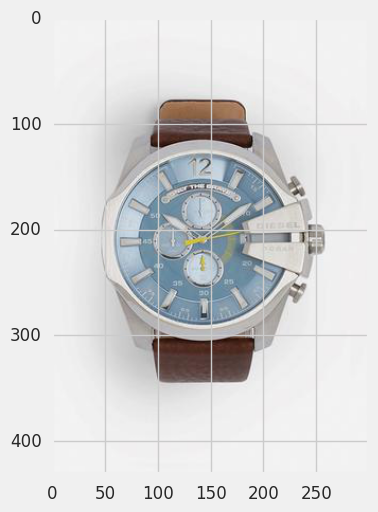

In [7]:
plotimg(pwd + '/data/train/accessories/productimg_1009.jpg')

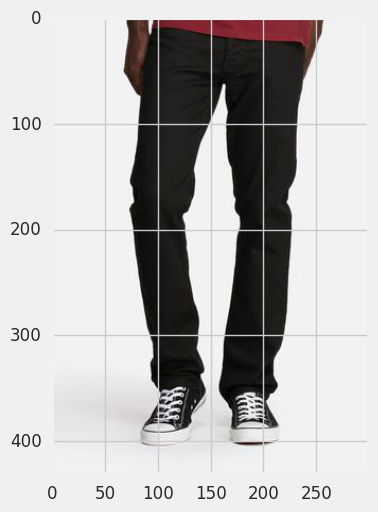

In [8]:
plotimg(pwd + '/data/train/jeans/productimg_1054.jpg')

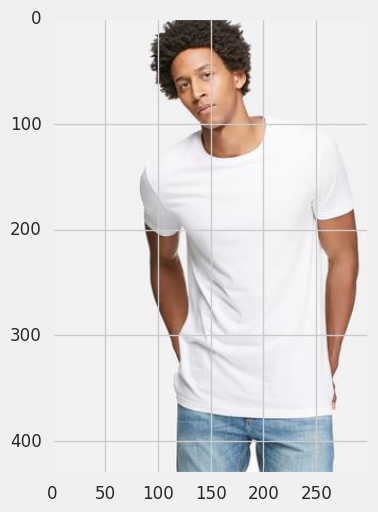

In [9]:
plotimg(pwd + '/data/train/tees/productimg_1023.jpg')

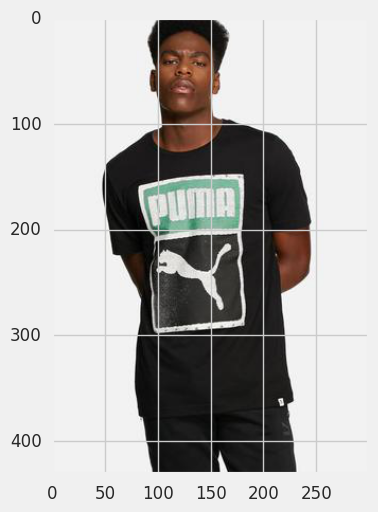

In [10]:
plotimg(pwd + '/data/train/activewear/productimg_299.jpg')

# CREATE TRAIN/TEST SPLIT

In [11]:
train_path= pwd + '/data/train/'
valid_path= pwd + '/data/valid/'
#
test_path = pwd + '/data/test/'
results_path= pwd + '/data/results/'

In [15]:
import random

create_train_test = False

# move 10% of each class to validation folder
# already copied all images in class subfolders to /data/train/
# so just move 10% of these to /data/valid/

if create_train_test:
    # first get list of subdirectories (these are the image class names)
    folders = os.listdir(train_path)
    # remove .DS_Store artefact - just want actual class names in list
    folders = [f for f in folders if not f.startswith('.')]

    for fo in folders:
        files = os.listdir(train_path + fo)
        files = [fi for fi in files if not fi.startswith('.')]

        # create class folder in /data/valid/ if doesn't already exist
        if not os.path.exists(valid_path + fo):
            os.makedirs(valid_path + fo)

        # select random 10% subset of images in this class and move to validation path
        subset = random.sample(files, len(files) / 10)

        for s in subset:
            os.rename(train_path + fo + "/" + s, valid_path + fo + "/" + s)

# LOAD VGG AND PREDICT IMAGENET CLASSES

In [16]:
#import Vgg16 helper class
vgg = Vgg16()

In [17]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [60]:
! tree /home/ubuntu/cnn_talk/data/valid/tees/o

/home/ubuntu/cnn_talk/data/valid/tees/
├── productimg_1112.jpg
├── productimg_1139.jpg
├── productimg_1245.jpg
├── productimg_1296.jpg
├── productimg_1355.jpg
├── productimg_1377.jpg
├── productimg_1402.jpg
├── productimg_1457.jpg
├── productimg_1499.jpg
├── productimg_1587.jpg
├── productimg_1712.jpg
├── productimg_1774.jpg
├── productimg_1802.jpg
├── productimg_1949.jpg
├── productimg_2040.jpg
├── productimg_2198.jpg
├── productimg_2231.jpg
├── productimg_2271.jpg
├── productimg_2307.jpg
├── productimg_2383.jpg
├── productimg_2408.jpg
├── productimg_2462.jpg
├── productimg_2486.jpg
├── productimg_2599.jpg
├── productimg_2641.jpg
├── productimg_2671.jpg
├── productimg_2736.jpg
├── productimg_2748.jpg
├── productimg_2776.jpg
├── productimg_2816.jpg
├── productimg_2824.jpg
├── productimg_2856.jpg
├── productimg_2869.jpg
├── productimg_286.jpg
├── productimg_2943.jpg
├── productimg_2946.jpg
├── productimg_2951.jpg
├── productimg_2991.jpg
├── productimg_2999.jpg
├── productimg_3023.jpg
├─

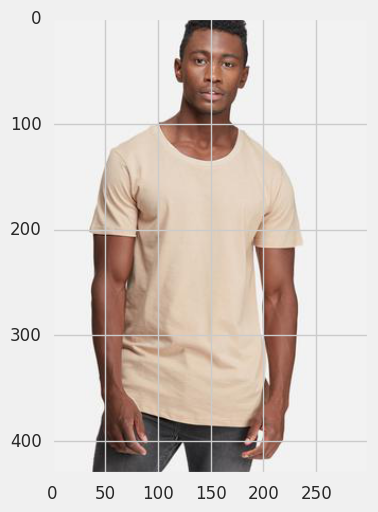

In [343]:
plotimg(pwd + '/data/valid/tees/productimg_846.jpg')

In [42]:
batches, preds = vgg.test(valid_path, batch_size = batch_size*2)

Found 418 images belonging to 9 classes.


In [43]:
preds = pd.DataFrame(preds)

In [44]:
preds.shape

(418, 1000)

In [45]:
preds['prediction_class_idx'] = preds.idxmax(axis=1)
preds['filename'] = batches.filenames

In [63]:
# get vgg class labels
imgnet_classes = pd.DataFrame(vgg.classes)
imgnet_classes.columns = ['imgnet_class']
pd.options.display.max_rows = 1000
imgnet_classes.head(1000)

,imgnet_class
0,tench
1,goldfish
2,great_white_shark
3,tiger_shark
4,hammerhead
5,electric_ray
6,stingray
7,cock
8,hen
9,ostrich


In [52]:
preds = pd.merge(preds, imgnet_classes, left_on='prediction_class_idx', right_index=True)

In [76]:
preds.tail()

,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,prediction_class_idx,filename,imgnet_class
368,2.6259e-05,2.5483e-06,1.105e-05,8.0659e-07,0.00017293,7.0651e-06,6.3553e-06,3.9194e-06,2.4514e-06,1.9224e-05,...,2.4263e-06,2.5141e-06,1.5076e-06,6.4703e-06,6.9036e-07,8.431e-05,0.00024358,543,tees/productimg_2824.jpg,dumbbell
311,7.0207e-05,3.2793e-05,5.1827e-05,3.2655e-06,0.00042264,1.2346e-05,2.1488e-05,3.7484e-05,1.1617e-05,0.0003862,...,5.9962e-06,8.0669e-06,1.3431e-05,0.00010865,1.7909e-06,0.00049384,0.0046339,862,tees/productimg_4116.jpg,torch
380,0.00014204,6.6652e-07,1.9909e-07,3.7144e-08,9.1964e-07,5.733e-07,3.0541e-07,4.9029e-06,1.2018e-05,1.4741e-06,...,3.3315e-07,1.4957e-06,5.6487e-07,3.8014e-05,5.1059e-07,0.00012398,0.00022519,411,tees/productimg_3790.jpg,apron
393,5.0264e-05,3.8552e-06,1.0013e-05,2.3744e-06,4.0675e-05,4.2799e-05,1.0023e-05,2.9113e-05,2.4503e-05,1.7669e-05,...,6.7253e-06,1.8852e-05,6.6341e-06,5.6524e-05,2.3305e-06,0.00010341,0.0026695,411,tees/productimg_3745.jpg,apron
411,4.8051e-05,3.568e-06,1.5943e-06,4.2456e-07,1.5312e-05,1.2114e-05,6.3778e-06,7.3627e-06,1.4749e-05,1.7342e-06,...,1.3716e-06,3.1912e-06,2.4838e-06,1.6793e-05,1.2441e-06,9.5575e-05,0.0006682,411,tees/productimg_3697.jpg,apron


In [82]:
imgnet_class_counts = preds['imgnet_class'].value_counts().sort_values(ascending=False)

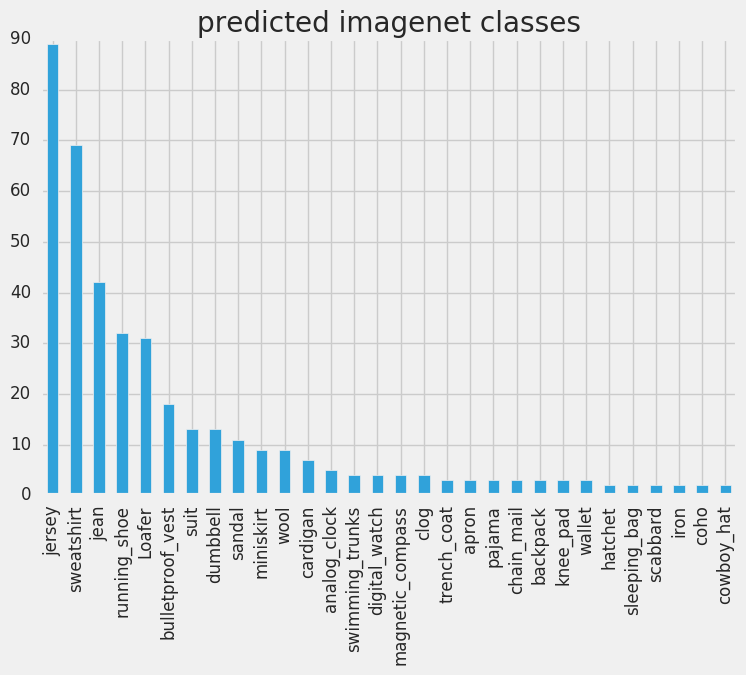

In [88]:
imgnet_class_counts[0:30].plot(kind="bar", title='predicted imagenet classes')

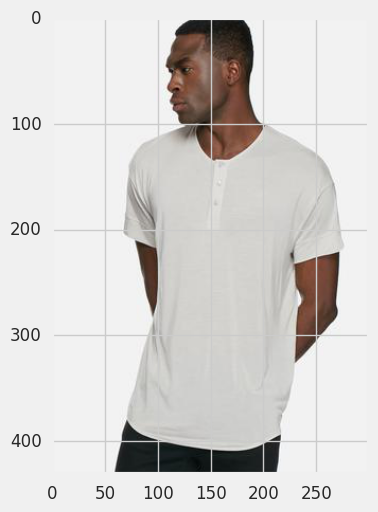

In [59]:
plotimg(pwd + '/data/valid/' + 'tees/productimg_2824.jpg')

# FINETUNE THE MODEL TO PREDICT 1/9 CLOTHING CATEGORIES

In [352]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

Found 3795 images belonging to 9 classes.
Found 418 images belonging to 9 classes.


In [353]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_3 (Lambda)                (None, 3, 224, 224)   0           lambda_input_3[0][0]             
____________________________________________________________________________________________________
zeropadding2d_27 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_3[0][0]                   
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_27[0][0]           
____________________________________________________________________________________________________
zeropadding2d_28 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_27[0][0]           
___________________________________________________________________________________________

In [354]:
model_run = 0

In [355]:
model_run+=1
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(results_path + "finetuned_%d.h5" % model_run)

Epoch 1/1
3795/3795 [==============================] - 111s - loss: 1.0108 - acc: 0.7144 - val_loss: 0.3950 - val_acc: 0.8636


In [356]:
# reduce learning rate and train some more
vgg.model.optimizer.lr = 0.001
model_run+=1
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(results_path + "finetuned_%d.h5" % model_run)

Epoch 1/1
3795/3795 [==============================] - 109s - loss: 0.6113 - acc: 0.8192 - val_loss: 0.3611 - val_acc: 0.8804


In [357]:
# reduce learning rate and train some more
vgg.model.optimizer.lr = 0.001
model_run+=1
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(results_path + "finetuned_%d.h5" % model_run)

Epoch 1/1
3795/3795 [==============================] - 108s - loss: 0.5638 - acc: 0.8221 - val_loss: 0.3894 - val_acc: 0.8684


In [358]:
# reduce learning rate and train some more
vgg.model.optimizer.lr = 0.01
model_run+=1
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(results_path + "finetuned_%d.h5" % model_run)

Epoch 1/1
3795/3795 [==============================] - 109s - loss: 0.4727 - acc: 0.8437 - val_loss: 0.3560 - val_acc: 0.8804


# USE THE TRAINED MODEL

Let's use our new model to make predictions on the test dataset

In [359]:
batches, preds = vgg.test(valid_path, batch_size = batch_size*2)

Found 418 images belonging to 9 classes.


In [360]:
preds = pd.DataFrame(preds)
preds['prediction_class'] = preds.idxmax(axis=1)
preds['filename'] = batches.filenames

In [361]:
preds

,0,1,2,3,4,5,6,7,8,prediction_class,filename
0,1,9.2662e-08,3.4509e-09,3.6668e-12,2.2705e-09,3.5874e-09,6.4151e-07,5.4612e-07,1.0313e-08,0,accessories/productimg_1201.jpg
1,0.99998,1.6527e-06,2.3798e-07,1.4226e-09,4.33e-08,9.6431e-10,1.465e-05,7.5608e-07,4.313e-06,0,accessories/productimg_2396.jpg
2,1,2.882e-07,1.2731e-09,7.6207e-13,2.5727e-11,1.5749e-10,2.6841e-08,8.7797e-08,2.0698e-08,0,accessories/productimg_878.jpg
3,1,4.0496e-11,4.5244e-13,3.4945e-16,4.7072e-14,1.0468e-15,5.5081e-11,7.8463e-09,1.0785e-12,0,accessories/productimg_1157.jpg
4,1,1.2086e-08,6.3461e-11,3.7365e-14,8.9382e-13,1.6143e-14,7.7308e-10,1.1891e-09,2.0864e-09,0,accessories/productimg_1155.jpg
5,0.99904,0.00013716,3.294e-07,4.0125e-08,4.5464e-08,1.0214e-09,0.0007713,3.2552e-05,1.8135e-05,0,accessories/productimg_1263.jpg
6,1,5.5093e-10,7.4571e-13,3.4127e-15,8.4678e-14,2.3141e-13,9.3767e-11,3.4385e-11,2.7489e-10,0,accessories/productimg_72.jpg
7,0.99962,4.1828e-07,6.0917e-06,6.3401e-07,1.3773e-06,1.5024e-08,0.00036766,6.5888e-08,6.8324e-06,0,accessories/productimg_236.jpg
8,0.99578,4.3009e-05,2.5977e-05,1.2827e-07,2.3191e-07,7.7563e-08,0.0031229,5.53e-05,0.00097333,0,accessories/productimg_2420.jpg
9,0.97386,4.6851e-07,1.8653e-07,2.8293e-07,1.0051e-05,7.1352e-08,0.026118,2.2981e-07,1.239e-05,0,accessories/productimg_2605.jpg


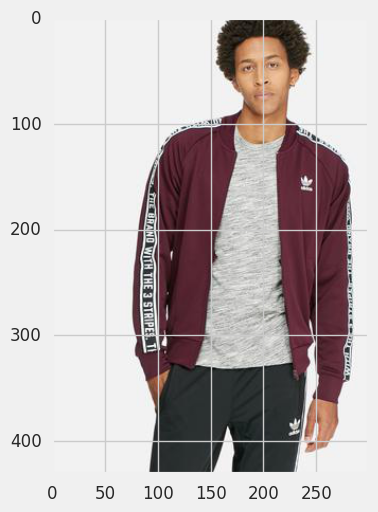

In [362]:
plotimg(pwd + '/data/valid/activewear/productimg_2200.jpg')

# CHOP OFF LAST LAYER TO GET ACTIVATIONS

In [363]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_3 (Lambda)                (None, 3, 224, 224)   0           lambda_input_3[0][0]             
____________________________________________________________________________________________________
zeropadding2d_27 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_3[0][0]                   
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_27[0][0]           
____________________________________________________________________________________________________
zeropadding2d_28 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_27[0][0]           
___________________________________________________________________________________________

In [364]:
# grab vgg keras model object
m = vgg.model

In [169]:
m.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [365]:
# chop off last 2 layers
m.pop()
m.pop()

In [366]:
# now final layer is:
# dense_2 (Dense)                  (None, 4096)          0           dropout_1[0][0] 
m.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_3 (Lambda)                (None, 3, 224, 224)   0           lambda_input_3[0][0]             
____________________________________________________________________________________________________
zeropadding2d_27 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_3[0][0]                   
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_27[0][0]           
____________________________________________________________________________________________________
zeropadding2d_28 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_27[0][0]           
___________________________________________________________________________________________

In [367]:
# update vgg model
vgg.model = m

In [368]:
vgg.compile()

# GET ACTIVATION VECTORS

validation set

In [369]:
# get activations for validation images
batches, preds = vgg.test(valid_path, batch_size = batch_size*2)

Found 418 images belonging to 9 classes.


In [370]:
vec_valid = pd.DataFrame(preds)
vec_valid['filename'] = batches.filenames

In [371]:
vec_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,filename
0,0.46867,1.7061,0.3849,0,0.92491,0.65635,0,0.60179,0,0.6923,...,0,0,0,0,0,2.904,1.1257,0,3.303,accessories/productimg_1201.jpg
1,0,0,0,1.3879,0,0,0,1.4983,0,1.4646,...,0,0,0,0,0.54216,0,3.5353,2.5327,0,accessories/productimg_2396.jpg
2,3.3238,1.8822,0,0,1.3926,0,0,0,0,0.16306,...,0,0,0,0,0,2.5847,4.8356,0,1.6606,accessories/productimg_878.jpg
3,3.8433,0,0,0,0,0,0,0.069406,0,1.0232,...,0,0,0,0,0,2.275,7.5399,0,1.2041,accessories/productimg_1157.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.3672,0,0,accessories/productimg_1155.jpg


test set 

In [372]:
# get activations for each image
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 8 images belonging to 1 classes.


In [373]:
vec_test = pd.DataFrame(preds)
vec_test['filename'] = batches.filenames

In [374]:
vec_test

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,filename
0,0.73969,0,0,0,0,0,0,3.41,0,6.8838,...,0,0,0,0,1.7819,0,0,0,0.40556,unknown/test4.jpg
1,0,0,0,0,0,0,0.64352,0,0,0,...,0.14349,0,0.96461,1.0461,2.3015,0.48441,0,0,0,unknown/test3.jpg
2,0,0,0,0,0,0,0,0.93592,1.7314,0,...,0,0,0,0,1.4845,0,0,0,0.23227,unknown/test6.jpg
3,0,0,0.71898,0,0,0,0,2.2881,0,1.1109,...,0,0,0.68857,0,0,0,0,0.6403,0.92892,unknown/test2.jpg
4,0,0,0,0,0,0,0,0,0,0.63857,...,0,0,1.5992,0,0.29559,0,0,0.30475,0,unknown/test7.jpg
5,0,0,0,0,0,0,0,2.1894,0,0,...,1.8118,0,6.0464,0,1.8806,0,0.07468,0,0,unknown/test8.jpg
6,0.28109,0,0,0,0,0,0,3.3303,0,2.7414,...,0,0,0,0,2.0927,0,0,0,0.93225,unknown/test5.jpg
7,0,0,0,0,0,0,0,0,0.1046,0,...,0,0,1.5603,0,0,0,0,0.61731,0,unknown/test1.jpg


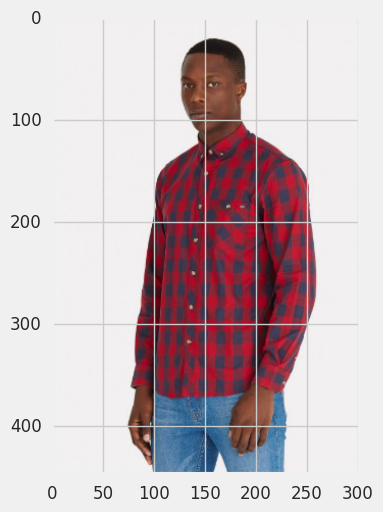

In [376]:
# 
plotimg(pwd + '/data/test/unknown/test2.jpg')

## SHOW MOST SIMILAR IMAGES

In [377]:
test_idx = 0

In [379]:
vec_valid.shape

(418, 4097)

In [380]:
vec_test.shape

(8, 4097)

In [381]:
vec_valid_num = vec_valid[range(0, 4096)]

In [382]:
vec_test_num = vec_test[range(0, 4096)]

In [383]:
vec_valid_num.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.46867,1.7061,0.3849,0,0.92491,0.65635,0,0.60179,0,0.6923,...,0,0,0,0,0,0,2.904,1.1257,0,3.303
1,0,0,0,1.3879,0,0,0,1.4983,0,1.4646,...,0,0,0,0,0,0.54216,0,3.5353,2.5327,0
2,3.3238,1.8822,0,0,1.3926,0,0,0,0,0.16306,...,0,0,0,0,0,0,2.5847,4.8356,0,1.6606
3,3.8433,0,0,0,0,0,0,0.069406,0,1.0232,...,0,0,0,0,0,0,2.275,7.5399,0,1.2041
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.3672,0,0


view test img

In [239]:
vec_test

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,filename
0,0.73969,0,0,0,0,0,0,3.41,0,6.8838,...,0,0,0,0,1.7819,0,0,0,0.40556,unknown/test4.jpg
1,0,0,0,0,0,0,0.64352,0,0,0,...,0.14349,0,0.96461,1.0461,2.3015,0.48441,0,0,0,unknown/test3.jpg
2,0,0,0,0,0,0,0,0.93592,1.7314,0,...,0,0,0,0,1.4845,0,0,0,0.23227,unknown/test6.jpg
3,0,0,0.71898,0,0,0,0,2.2881,0,1.1109,...,0,0,0.68857,0,0,0,0,0.6403,0.92892,unknown/test2.jpg
4,0,0,0,0,0,0,0,0,0,0.63857,...,0,0,1.5992,0,0.29559,0,0,0.30475,0,unknown/test7.jpg
5,0,0,0,0,0,0,0,2.1894,0,0,...,1.8118,0,6.0464,0,1.8806,0,0.07468,0,0,unknown/test8.jpg
6,0.28109,0,0,0,0,0,0,3.3303,0,2.7414,...,0,0,0,0,2.0927,0,0,0,0.93225,unknown/test5.jpg
7,0,0,0,0,0,0,0,0,0.1046,0,...,0,0,1.5603,0,0,0,0,0.61731,0,unknown/test1.jpg


In [386]:
test_img_idx = 0

In [387]:
vec_test.loc[test_img_idx]['filename']

'unknown/test4.jpg'

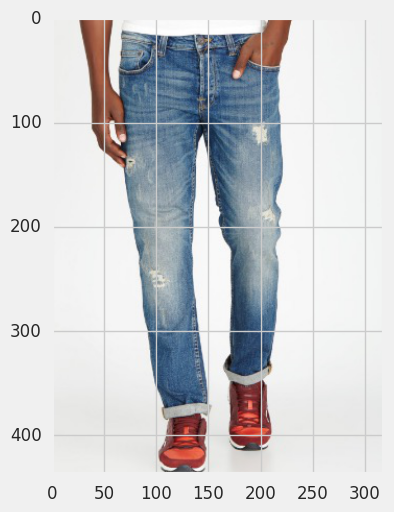

In [388]:
plotimg(pwd + '/data/test/' + vec_test.loc[test_img_idx]['filename'])

do dot prod

In [389]:
test_img_vec = vec_test_num.loc[test_img_idx][:]
test_img_vec = test_img_vec.reshape(len(test_img_vec),1)

In [390]:
vec_valid_num.values.shape

(418, 4096)

In [391]:
test_img_vec.shape

(4096, 1)

In [392]:
test_img_vec[0]

array([ 0.73969], dtype=float32)

In [393]:
a = np.dot(vec_valid_num.ix[:], test_img_vec)

In [396]:
vec_valid.shape

(418, 4097)

In [397]:
a.shape

(418, 1)

In [398]:
# join filenames and sort on scores descending
results = pd.DataFrame(a)
results['filenames'] = vec_valid['filename']
results.columns = ['scores', 'filenames']
results.sort_values('scores', ascending = False, inplace = True)
results.head()

,scores,filenames
108,"7,089.2",jeans/productimg_1596.jpg
100,"6,927.5",jeans/productimg_1017.jpg
102,"6,783",jeans/productimg_1404.jpg
97,"6,623.9",jeans/productimg_2011.jpg
111,"6,098.9",jeans/productimg_1531.jpg


In [399]:
matches = results['filenames'].values[:10]
match_scores = results['scores'].values[:10]

In [400]:
matches

array(['jeans/productimg_1596.jpg', 'jeans/productimg_1017.jpg', 'jeans/productimg_1404.jpg',
       'jeans/productimg_2011.jpg', 'jeans/productimg_1531.jpg', 'jeans/productimg_1429.jpg',
       'jeans/productimg_499.jpg', 'jeans/productimg_1096.jpg', 'jeans/productimg_127.jpg',
       'jeans/productimg_304.jpg'], dtype=object)

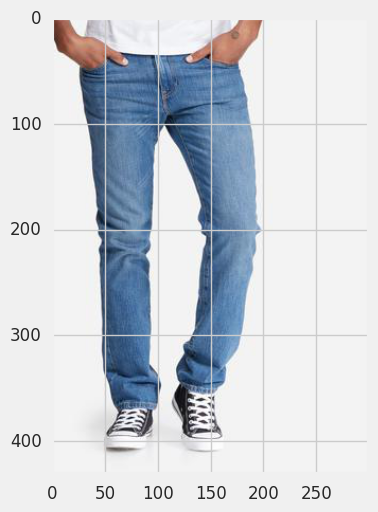

In [402]:
plotimg(pwd + '/data/valid/' + matches[0])

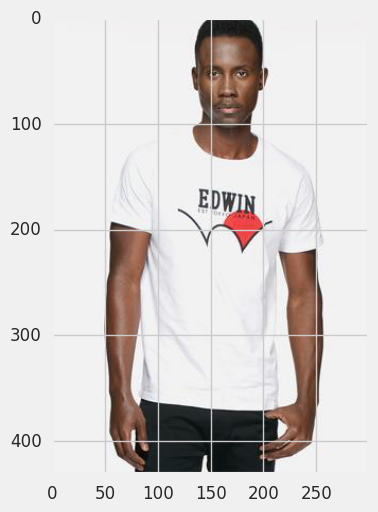

In [315]:
plotimg(pwd + '/data/valid/' + top5_filenames[1])

In [403]:
def plot_pic_grid(filenames):
    # set figsize
    fig = plt.figure()
    fig.set_size_inches((16,8))

    plotted = 0

    for c, r in enumerate(filenames):

        # get path to image file 
        img_path_on_disk = pwd + '/data/valid/' + r

        if len(img_path_on_disk) > 0:    

            if plotted < 10:

                plotted+=1

                # plotting 10 images
                a = fig.add_subplot(2, 5, (plotted))
                img= plt.imread(img_path_on_disk)
                imgplot = a.imshow(img)
                a.set_title(match_scores[c])

                #print user_id, 'image plotted'
        else:
            # print user_id, 'no pic available'
            pass

# WRAP AS FUNCTION

In [404]:
test_idx = 0

In [405]:
def get_most_similar_products(test_img_idx):
    # plot test img
    vec_test.loc[test_img_idx]['filename']
    plotimg(pwd + '/data/test/' + vec_test.loc[test_img_idx]['filename'])
    
    # do dot prod
    test_img_vec = vec_test_num.loc[test_img_idx][:]
    test_img_vec = test_img_vec.reshape(len(test_img_vec),1)
    a = np.dot(vec_valid_num.ix[:], test_img_vec)
    
    # transform scores
    results = pd.DataFrame(a)
    results['filenames'] = vec_valid['filename']
    results.columns = ['scores', 'filenames']
    results.sort_values('scores', ascending = False, inplace = True)
    results.head()
    
    # get matches
    matches = results['filenames'].values[:10]
    match_scores = results['scores'].values[:10]
    
    plot_pic_grid(matches)

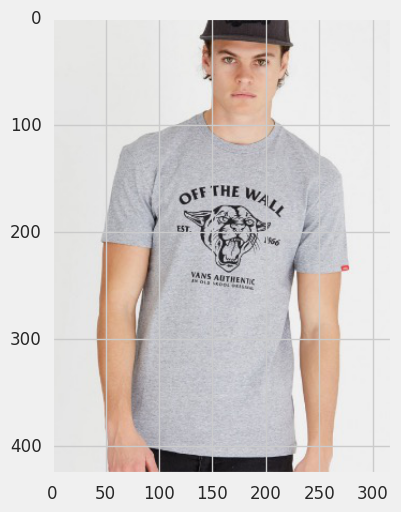

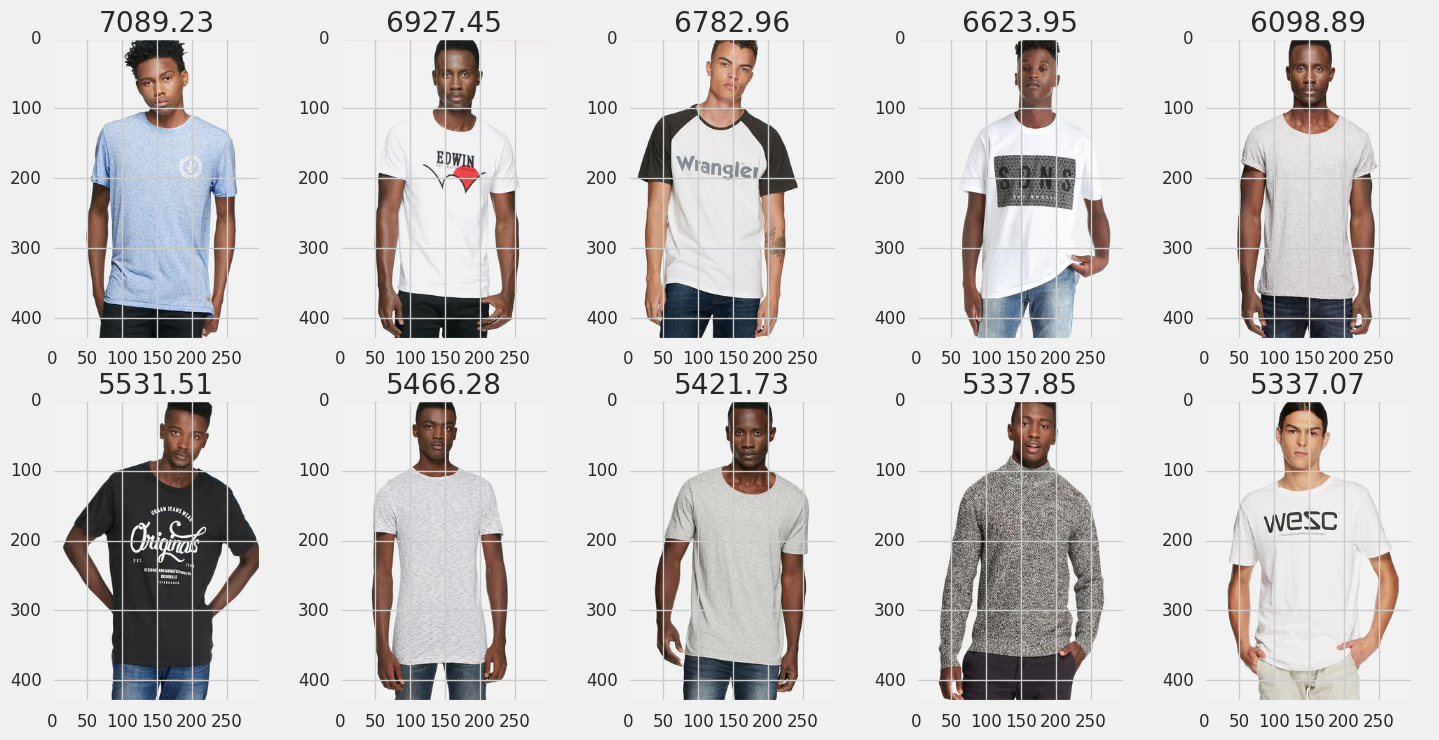

In [408]:
get_reccs(2)